# Using Linear Regression to Predict Honey Production

In this notebook, we will be analyzing American honey production across the nation using data from 1998 to 2012. We'll be working with a dataset sourced from Codecademy, and will be using Python's Pandas library, as well as some data visualization packages to attempt to fit a regression line to the production numbers, which has been in a steady state of decline due to the dwindling honeybee population, and use it to predict future production numbers.

Let's first import the required dependencies.

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

Now let's load our 'honeyproduction.csv' file and load it into a dataframe.

In [2]:
#Replace the existing file path as needed
df = pd.read_csv("Desktop/Honey Production Project/honeyproduction.csv")

Let's take a look at the dataframe.

In [3]:
df.head()

state    numcol  yieldpercol   totalprod      stocks  priceperlb  \
0    AL   16000.0           71   1136000.0    159000.0        0.72   
1    AZ   55000.0           60   3300000.0   1485000.0        0.64   
2    AR   53000.0           65   3445000.0   1688000.0        0.59   
3    CA  450000.0           83  37350000.0  12326000.0        0.62   
4    CO   27000.0           72   1944000.0   1594000.0        0.70   

    prodvalue  year  
0    818000.0  1998  
1   2112000.0  1998  
2   2033000.0  1998  
3  23157000.0  1998  
4   1361000.0  1998

We're interested in the columns 'totalprod' and 'year', since we are trying to fit a regression line to honey production over time. Let's first obtain the average honey production per year by aggregating the data of all the states. We can use a 'groupby' method, grouping total production by year, and store that in 'prod_per_year'.

In [4]:
prod_per_year = df.groupby('year').totalprod.mean().reset_index()

Let's take a look at this new dataframe.

In [5]:
prod_per_year

year     totalprod
0   1998  5.105093e+06
1   1999  4.706674e+06
2   2000  5.106000e+06
3   2001  4.221545e+06
4   2002  3.892386e+06
5   2003  4.122091e+06
6   2004  4.456805e+06
7   2005  4.243146e+06
8   2006  3.761902e+06
9   2007  3.600512e+06
10  2008  3.974927e+06
11  2009  3.626700e+06
12  2010  4.382350e+06
13  2011  3.680025e+06
14  2012  3.522675e+06

We now have viable x and y features with which to plot a graph of honey production numbers. Let's store the 'year' column in a variable called x, and the 'totalprod' column to a variable called y.

In [6]:
x = prod_per_year.year
x = x.values.reshape(-1, 1)

y = prod_per_year.totalprod

Let's create a scatter plot of this data, to get an idea of the production trend over time.

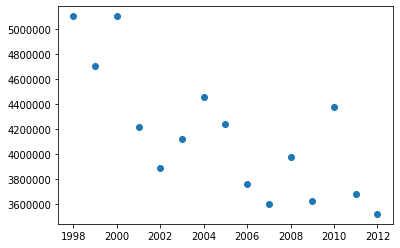

In [7]:
plt.scatter(x, y)

We can already see a linear relationship between honey production and time. The data seems to be trending towards a decline. We can now use ScikitLearn's linear regression method to fit a line to these data points. This will allow us to estimate future honey production numbers using the information from previous years.

From 'sklearn', we imported the 'linear_model' module. From this, we can use the 'LinearRegression' constructor, which takes in an x and y column as parameters. Let's store the constructor in a variable called 'regr'.

In [8]:
regr = linear_model.LinearRegression()

We can use the '.fit()' method and pass in x and y parameters to fit a line to the data. After the line is fitted, we can use the '.predict()' method to generate the predicted y_values that correspond to the fitted line. We can store these values in a variable called 'y_predict'.

In [9]:
regr.fit(x, y)
y_predict = regr.predict(x)

So, we now have the y_values of the line of best fit that describes the scatter plot above. Let's take a look at this line by plotting it against x, which are the production years from 1998 to 2012.

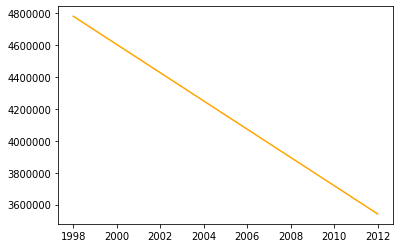

In [10]:
plt.plot(x, y_predict, color = 'orange')

As we predicted, production numbers are in a general state of significant decline, as shown by the line. Let's take a look at the slope of this line.

In [12]:
regr.coef_

array([-88303.18915238])

According to the regression line, honey production numbers decline by about 88,303 pounds per year. This decline can be attributed to the significant dwindling of honey bee populations across America. Indeed, bees are slowly going extinct. More information can be found here: https://www.greenpeace.org/usa/sustainable-agriculture/save-the-bees/#:~:text=U.S.%20National%20Agricultural%20Statistics%20show,2008%2C%20a%2060%20percent%20reduction.&text=In%20the%20U.S.%20%E2%80%94%20among%20crops,by%2090%20percent%20since%201962.

Let's use this regression line to predict honey production numbers from 2013 to the year 2050. First, we create an array for the year values from 2013 to 2050 using Python's 'range' method.

In [13]:
x_future = np.array(range(2013, 2051))
x_future = x_future.reshape(-1, 1)

Now, let's create a variable to store the predicted y-values for future numbers, called 'future_predict'. 

In [14]:
future_predict = regr.predict(x_future)

We can now plot these values against the future years.

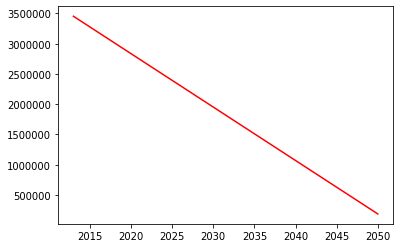

In [15]:
plt.plot(x_future, future_predict, 'red')
plt.show()

So, according to this model, honey production numbers will drop from what was nearly 4.8 million pounds in 1998 to less than 500,000 pounds by 2050. Quite a staggering drop, and one that will have global implications within the food industry unless concerted efforts are made to revive the honeybee population.